In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

# Initialization

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [5]:
# print all the name of the columns
for col in df.columns : print(col)

Gender
Age
Height
Weight
family_history_with_overweight
FAVC
FCVC
NCP
CAEC
SMOKE
CH2O
SCC
FAF
TUE
CALC
MTRANS
NObeyesdad


In [6]:
# print (number of rows, number of columns)
df.shape

(2111, 17)

In [7]:
# print the type of each column variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
# print for each variables, the number of missing values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values in this dataset.

In [9]:
# statistics for quantitative variables
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

We can see our standard deviation is high : 26.2

We can add that the spread between the max and the min is large : 173 - 39 = 134

In fact, it's quite hard to define if the standard deviation is large or not. For more details, we can compute the coefficient of variation which give us how large is the standard deviation compared to mean :


In [10]:
cv_weight = (df["Weight"].std() / df["Weight"].mean())*100

In [11]:
print(cv_weight)

30.24871707053116


The standard deviation compared to the mean of weight is large by 30.2%

Same for height :

In [12]:
cv_height = (df["Height"].std() / df["Height"].mean())*100

In [13]:
print(cv_height)

5.483108750445909


The standard deviation compared to the mean of height is large by only 5.5% which is not significantly large.

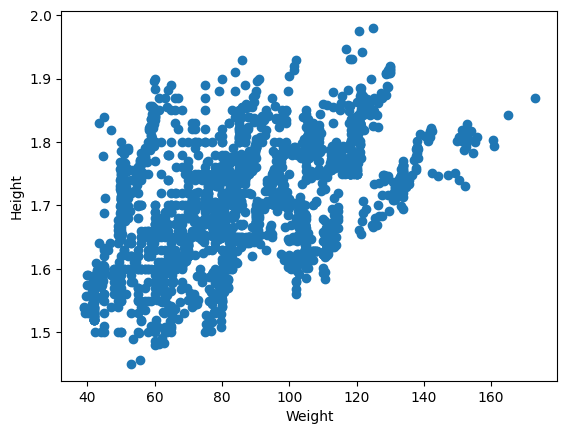

In [14]:
fig, ax = plt.subplots()

ax.scatter(df["Weight"], df["Height"])
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

In [15]:
df["ln_weight"]=np.log(df["Weight"])
df["ln_height"]=np.log(df["Height"])

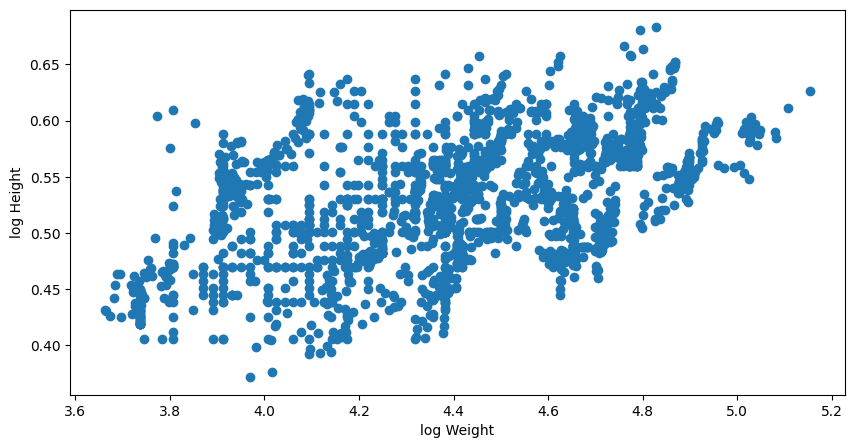

In [16]:
fig, ax = plt.subplots()

ax.scatter(df["ln_weight"], df["ln_height"])
ax.set_xlabel("log Weight")
ax.set_ylabel("log Height")
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

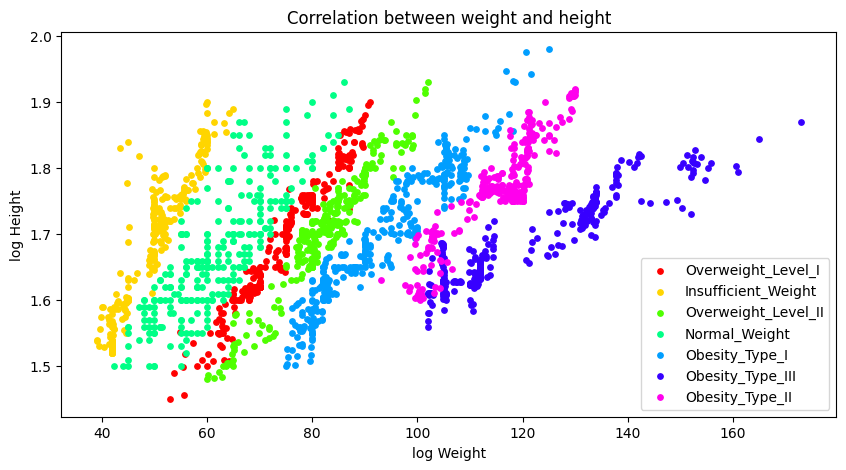

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Scatter of Petal
x = df['Weight']
y = df['Height']

# Get the obesity type
uniq = list(set(df['NObeyesdad']))

# Set the color map to match the type
z = range(1, len(uniq))
cmap = plt.get_cmap('hsv')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# Plot each type
for i in range(len(uniq)):
    indx = df['NObeyesdad'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('log Weight')
plt.ylabel('log Height')
plt.title('Correlation between weight and height')
plt.legend(loc='lower right')
plt.show()


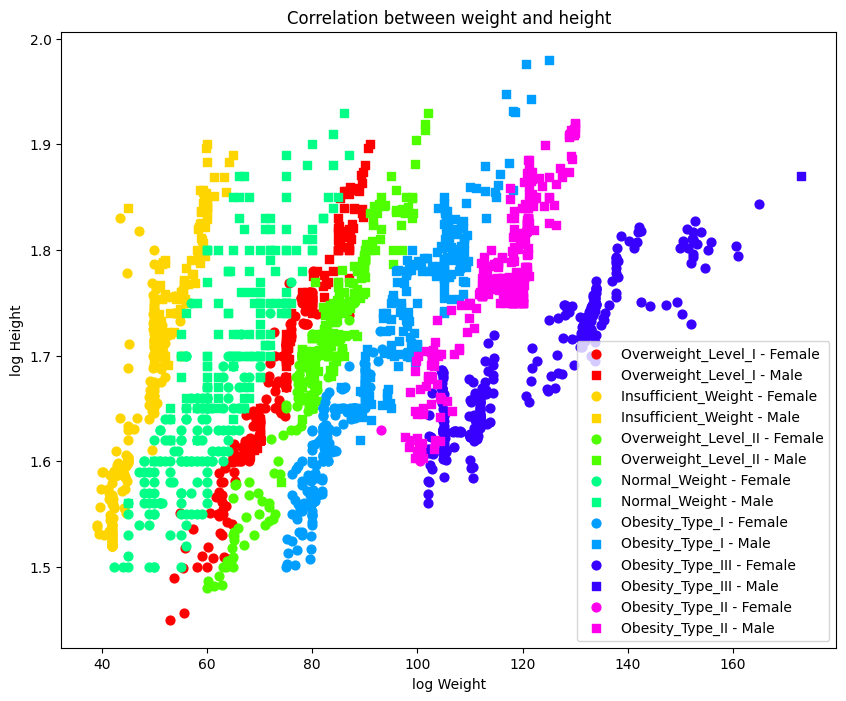

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter of Petal
x = df['Weight']
y = df['Height']
obesity_type = df['NObeyesdad']
gender = df['Gender']

# Get unique obesity types
uniq_obesity = list(set(obesity_type))

# Set the color map to match the type
cmap = plt.get_cmap('hsv')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq_obesity))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# Define marker shapes for each gender
marker_shapes = ['o', 's']  # You can add more shapes if needed

# Plot each type of obesity
for i, ob in enumerate(uniq_obesity):
    indx_obesity = obesity_type == ob
    for j, g in enumerate(set(gender)):
        indx_gender = gender == g
        plt.scatter(x[indx_obesity & indx_gender], y[indx_obesity & indx_gender], s=40,
                    color=scalarMap.to_rgba(i), marker=marker_shapes[j], label=f'{ob} - {g}')

plt.xlabel('log Weight')
plt.ylabel('log Height')
plt.title('Correlation between weight and height')
plt.legend(loc='lower right')
plt.show()


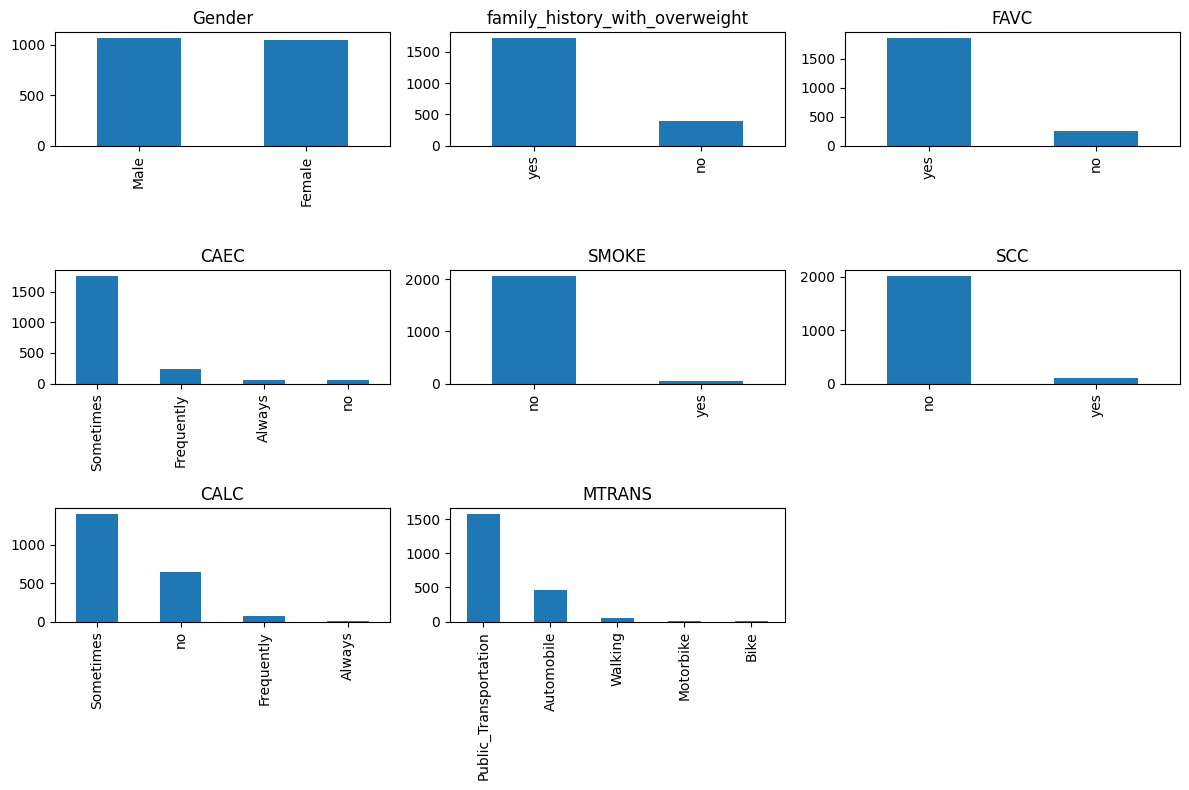

In [19]:
# Mise à jour de la liste des colonnes catégorielles
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

# Visualisations pour les variables catégorielles
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar', title=col)
plt.tight_layout()
plt.show()

In [20]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

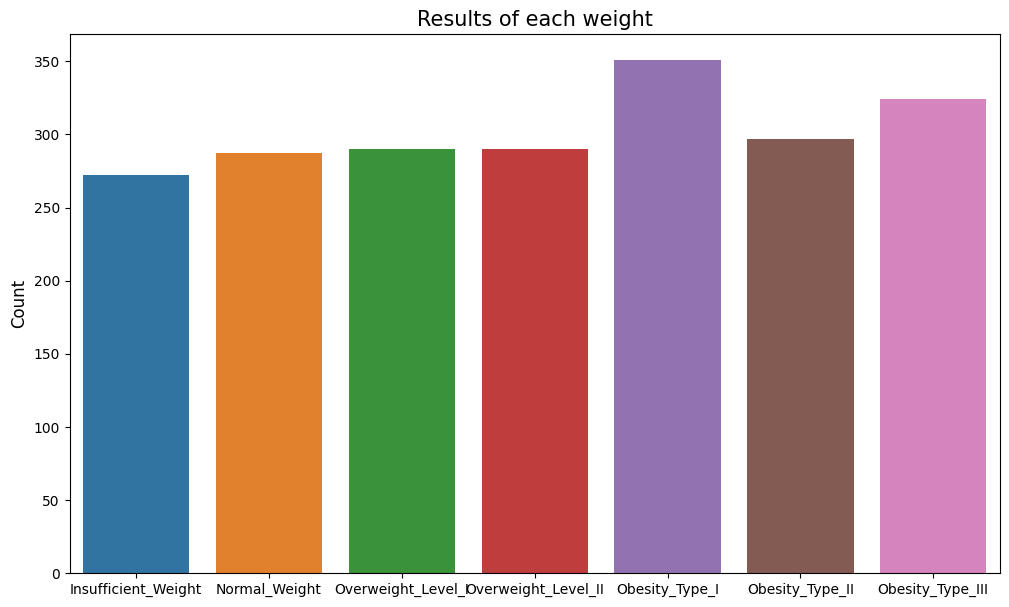

In [21]:
name = df['NObeyesdad'].value_counts().index
num = df['NObeyesdad'].value_counts().values

fig = px.pie(data_frame=df,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,7))
sns.countplot(x='NObeyesdad',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

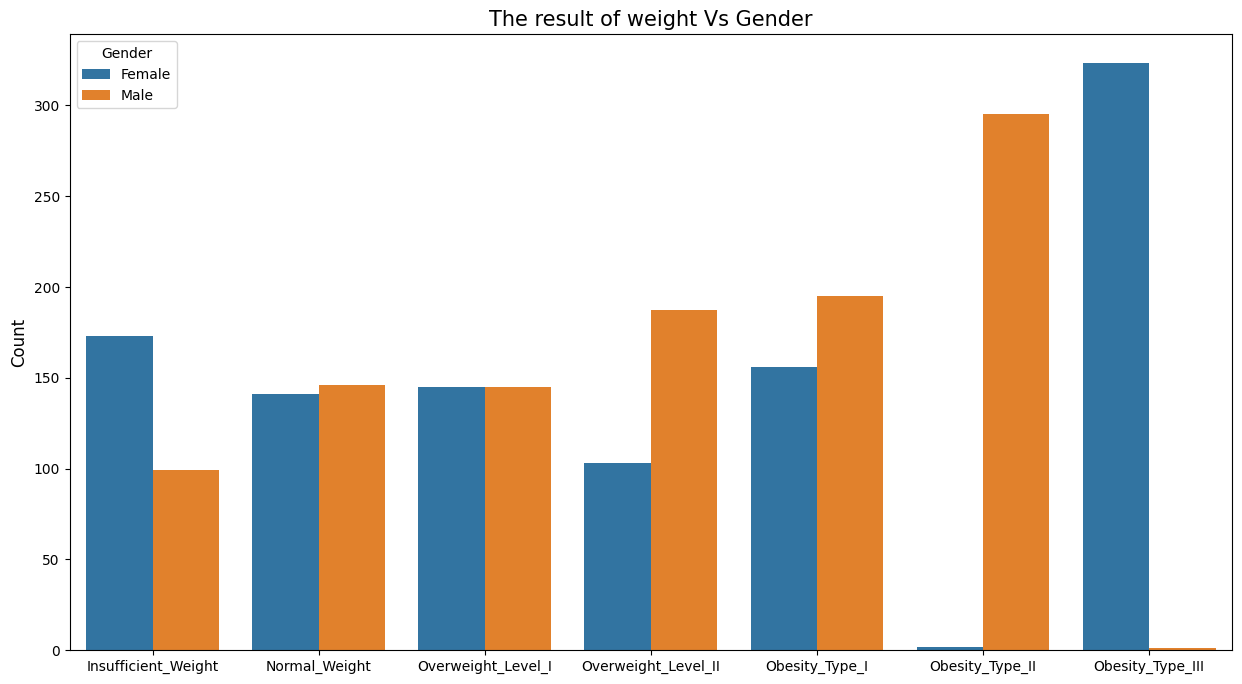

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

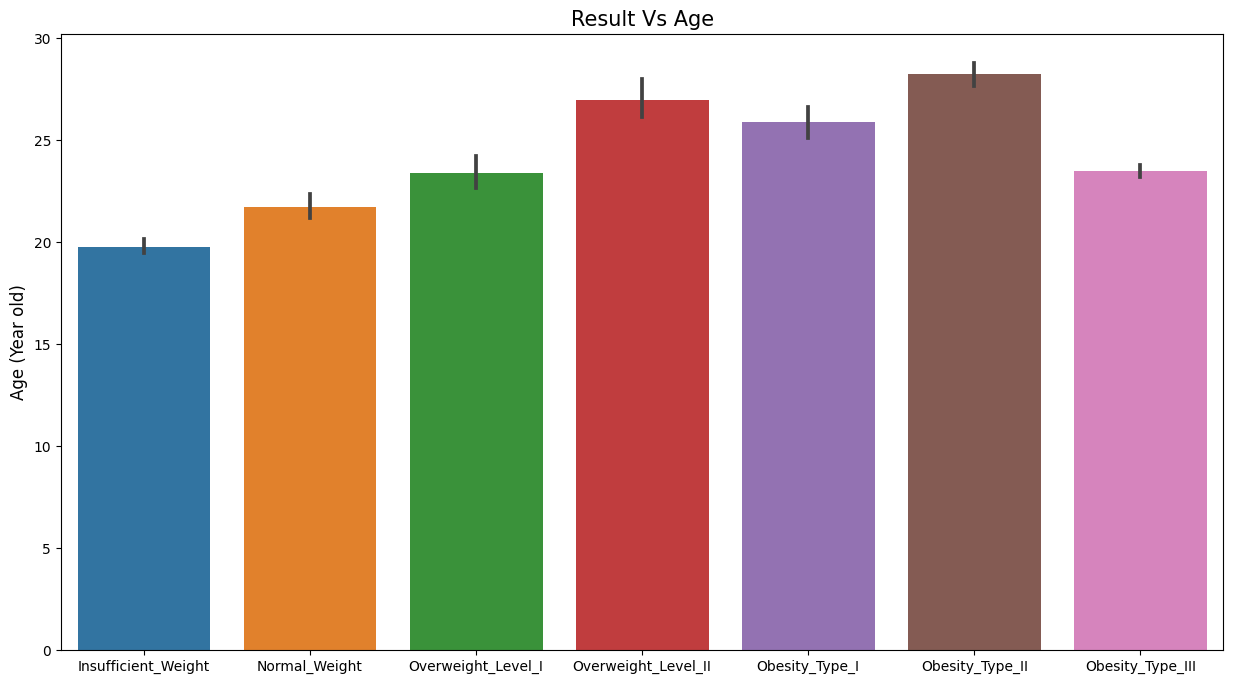

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

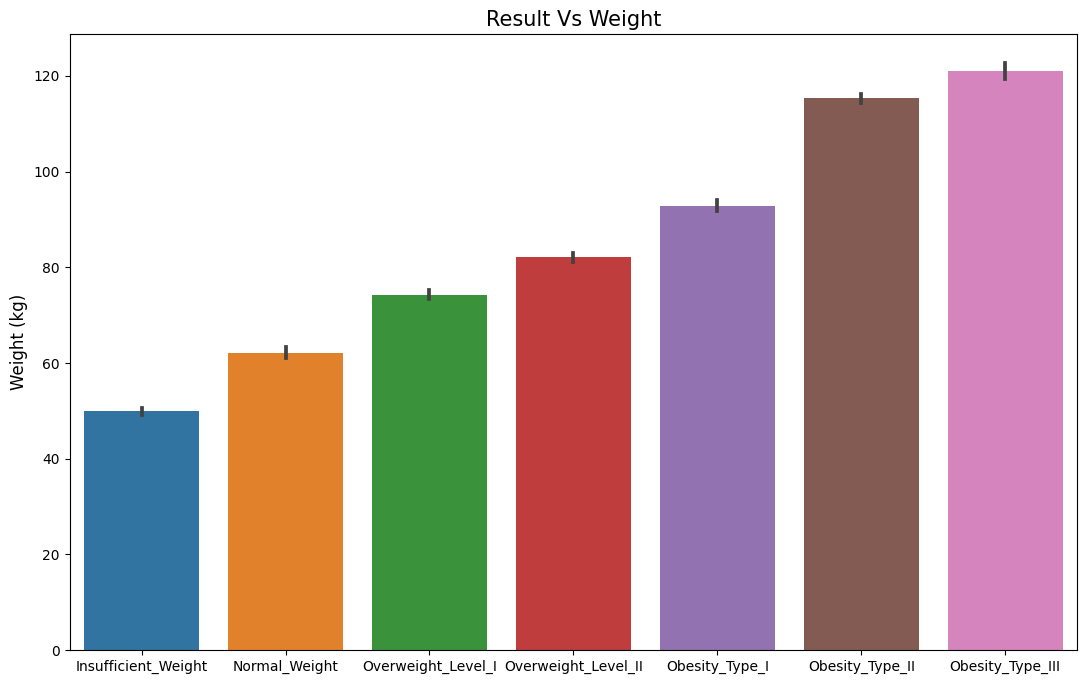

In [24]:
plt.figure(figsize=(13,8))
sns.barplot(x='NObeyesdad',y='Weight',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('Result Vs Weight',fontsize=15)
plt.show()

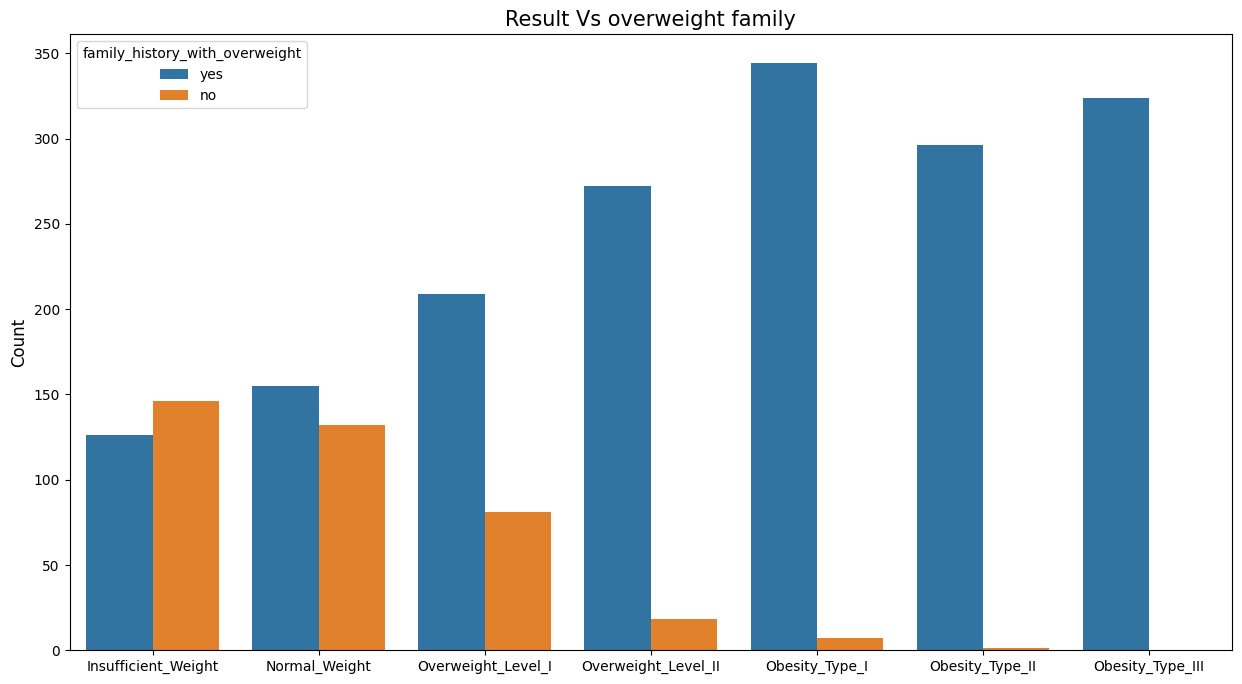

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='family_history_with_overweight',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()

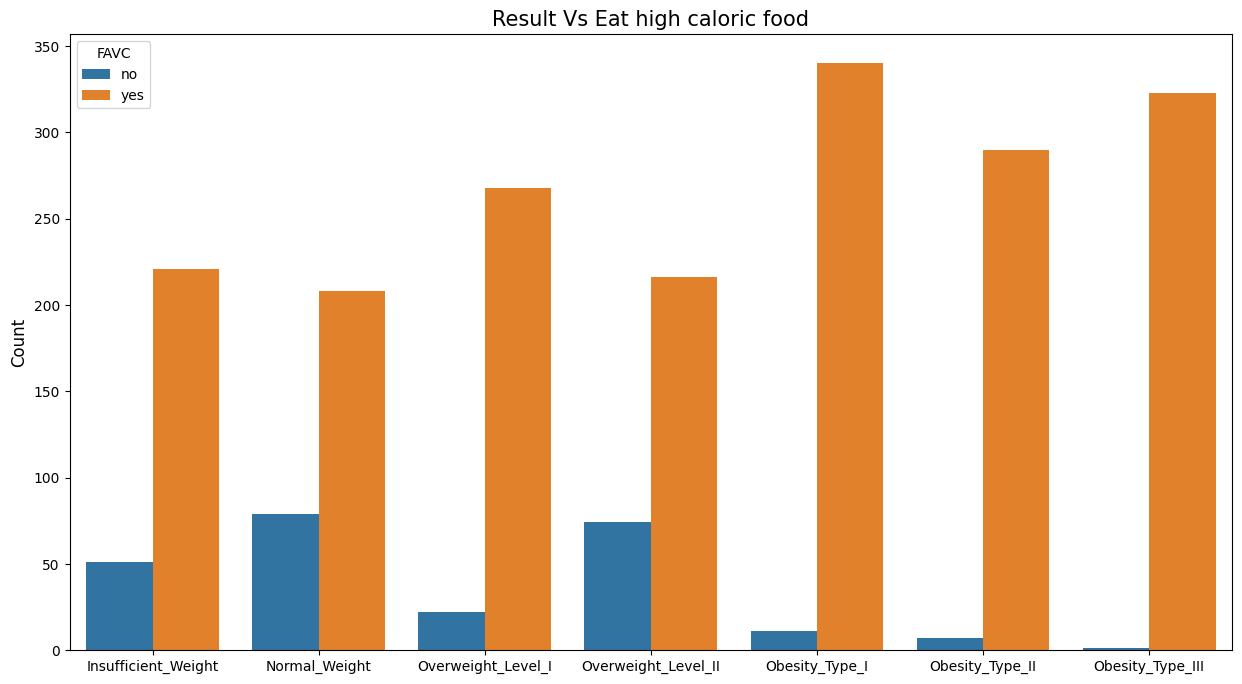

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='FAVC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Eat high caloric food',fontsize=15)
plt.show()

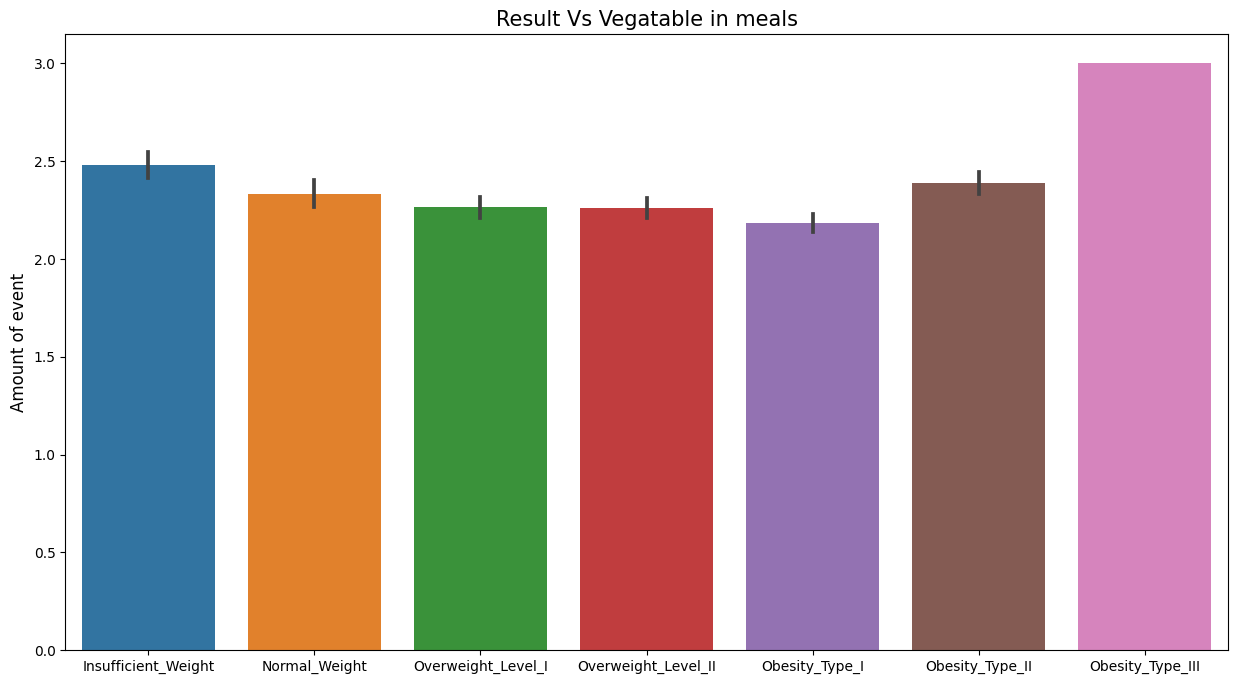

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='FCVC',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of event',fontsize=12)
plt.title('Result Vs Vegatable in meals',fontsize=15)
plt.show()

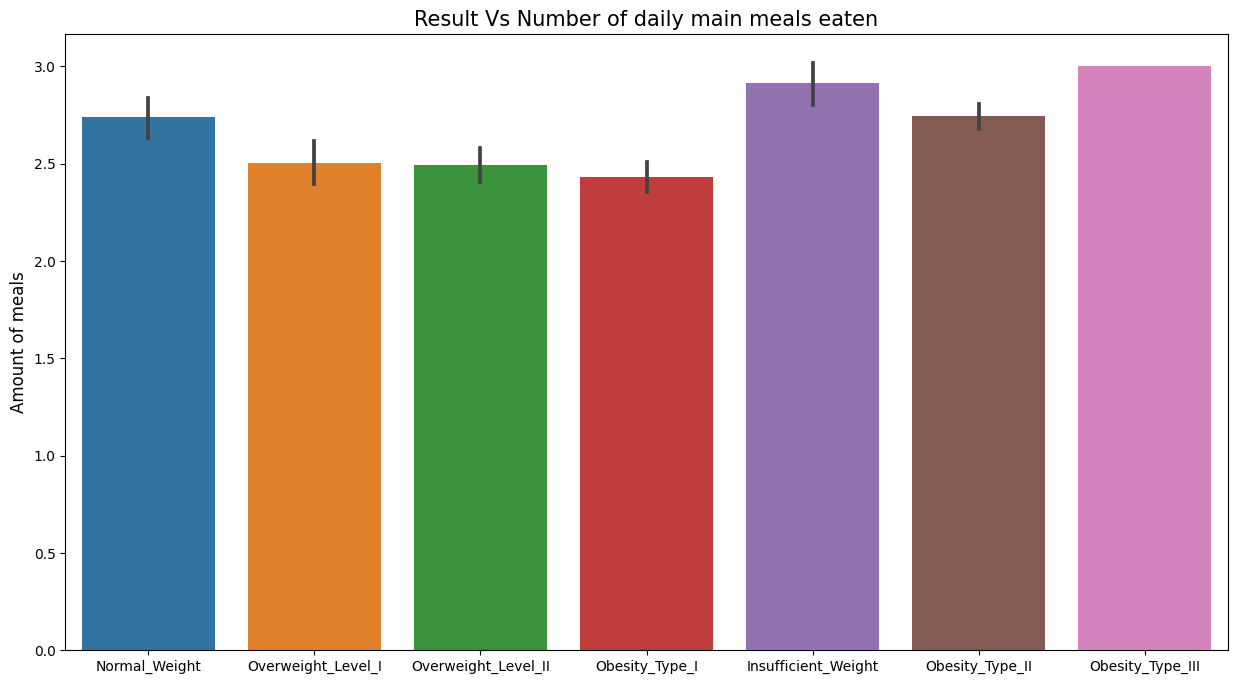

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='NCP',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=12)
plt.title('Result Vs Number of daily main meals eaten',fontsize=15)
plt.show()

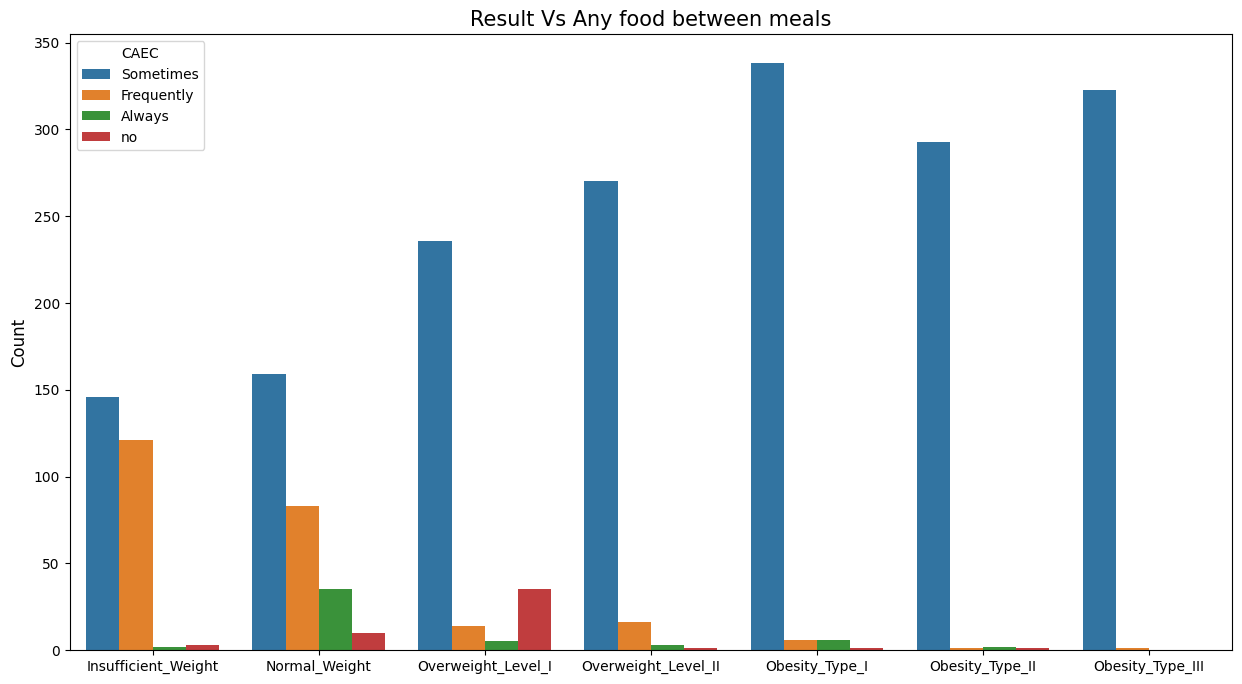

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='CAEC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Any food between meals',fontsize=15)
plt.show()

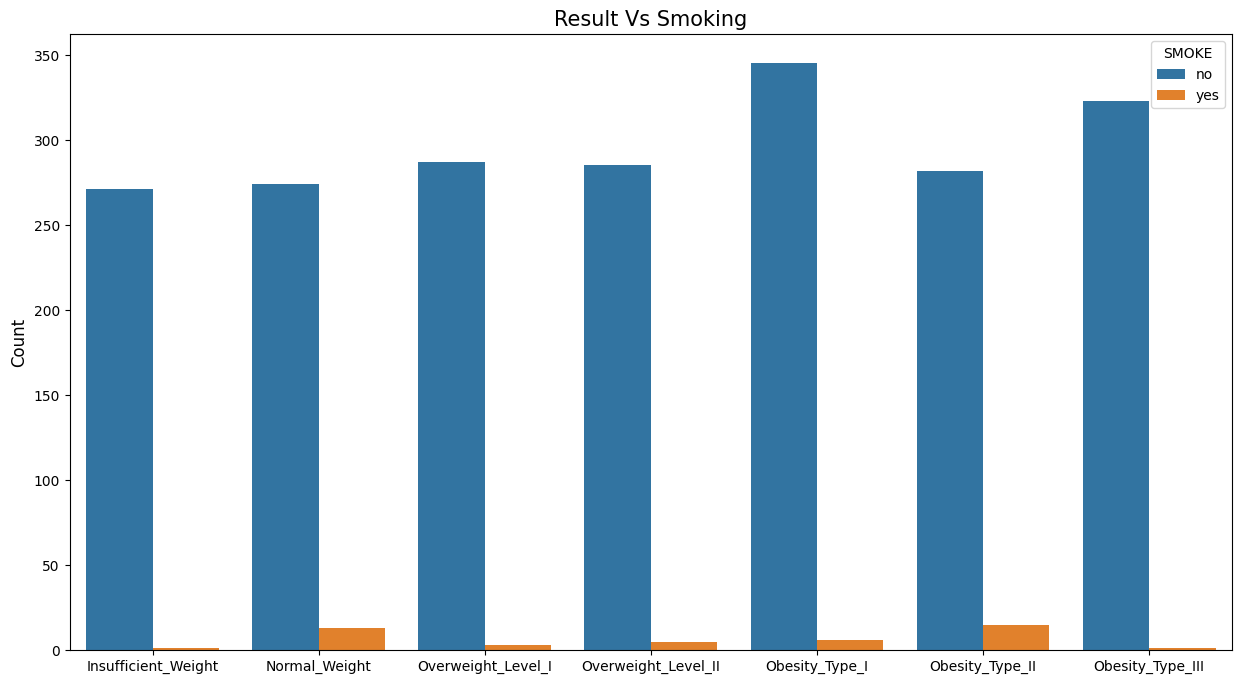

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='SMOKE',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Smoking',fontsize=15)
plt.show()

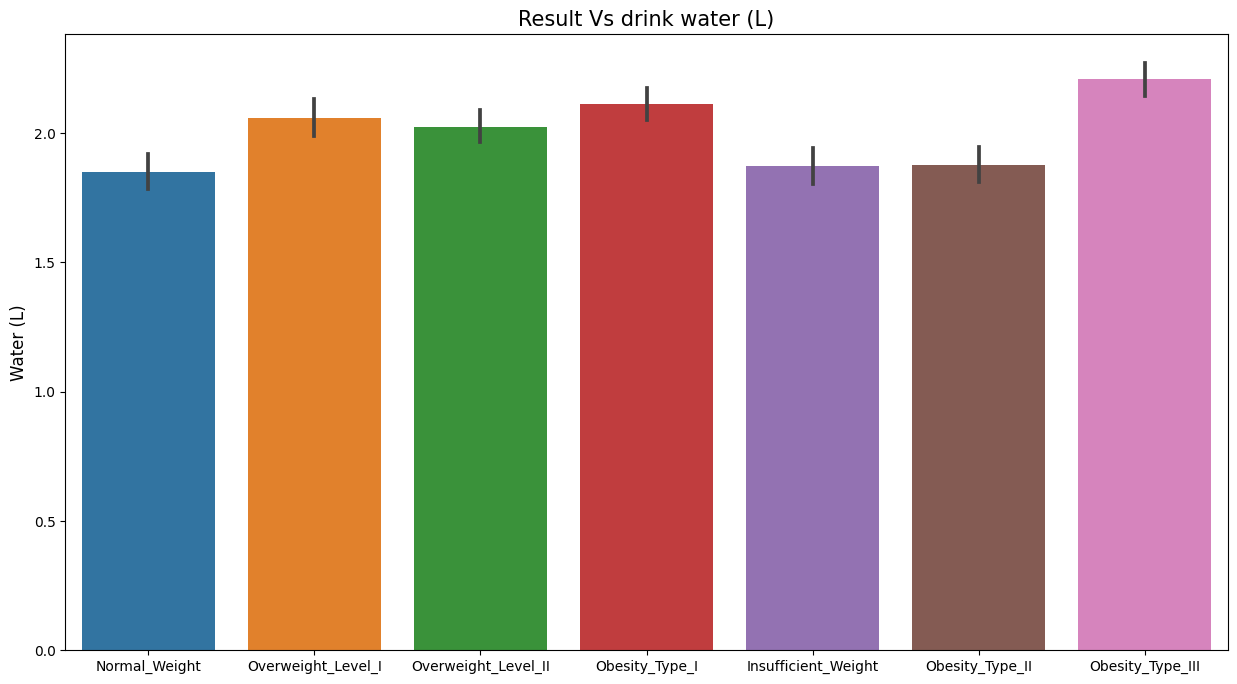

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='CH2O',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Water (L)',fontsize=12)
plt.title('Result Vs drink water (L)',fontsize=15)
plt.show()

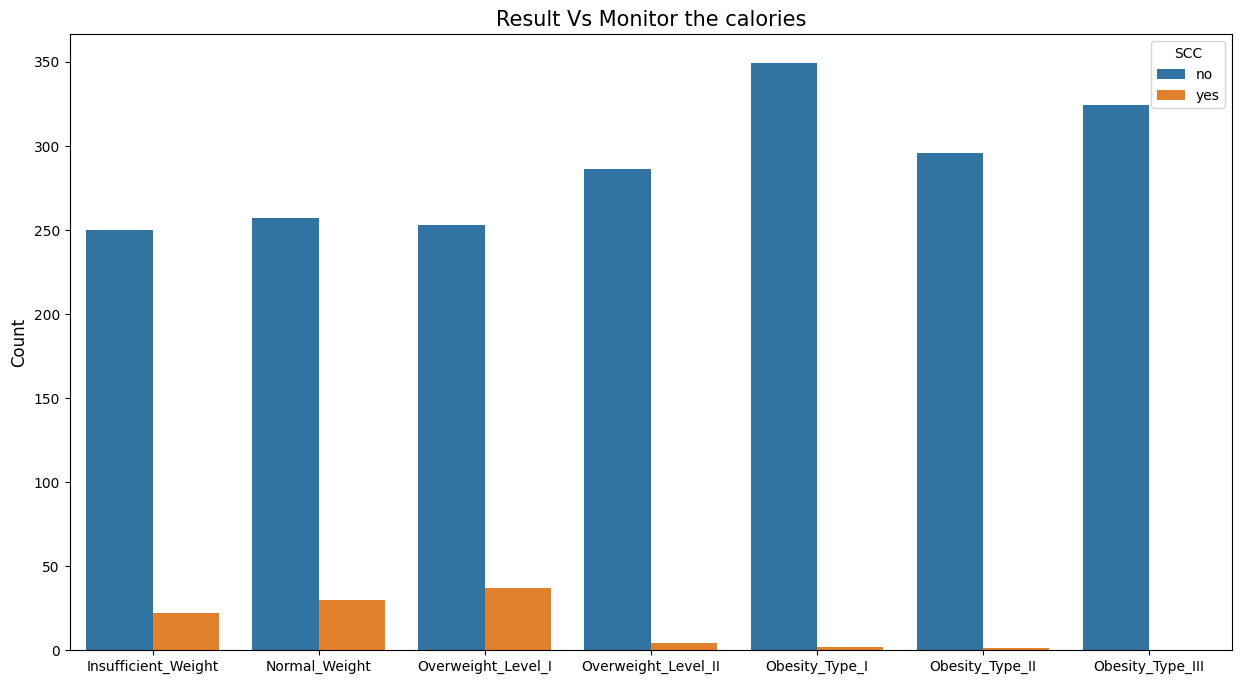

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='SCC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Monitor the calories',fontsize=15)
plt.show()

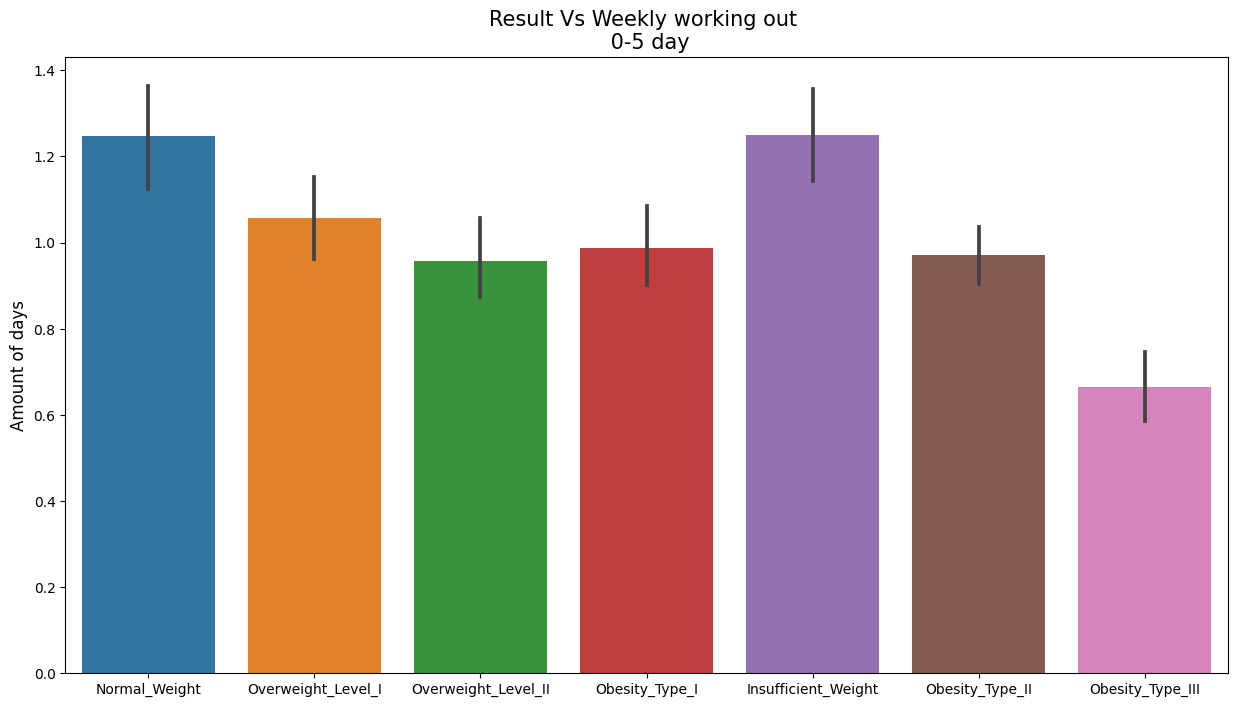

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='FAF',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Amount of days',fontsize=12)
plt.xlabel(None)
plt.title('Result Vs Weekly working out \n 0-5 day',fontsize=15)
plt.show()

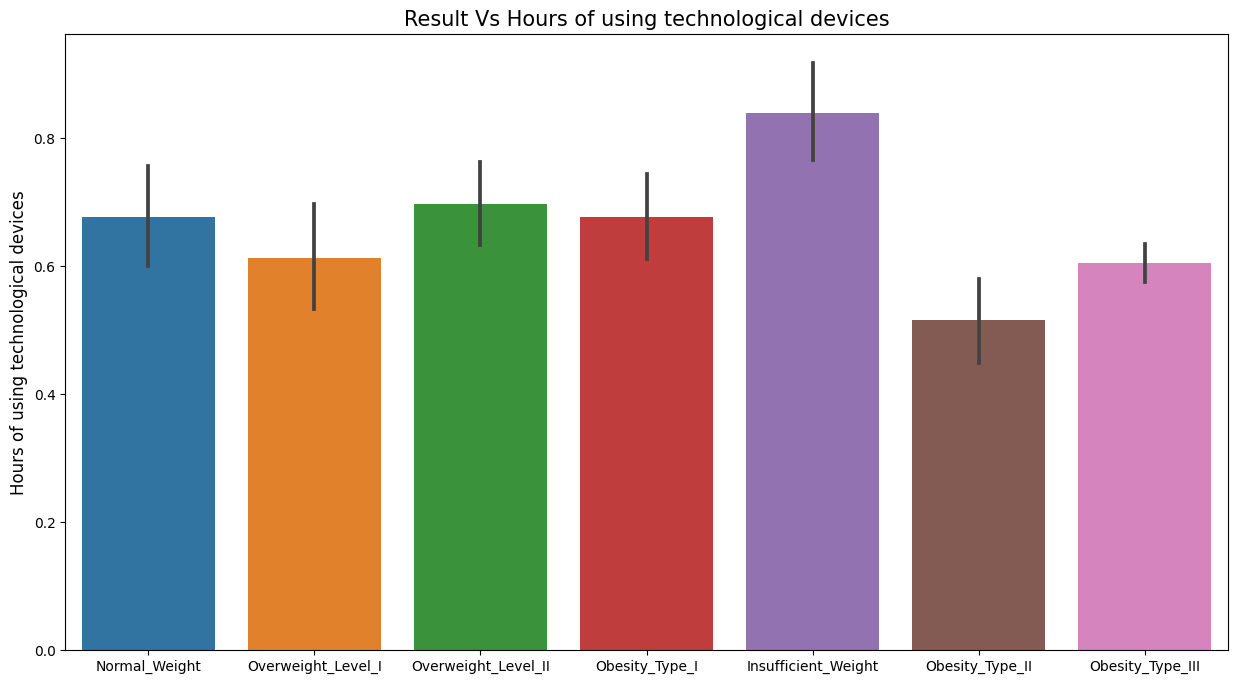

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='TUE',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Hours of using technological devices',fontsize=12)
plt.title('Result Vs Hours of using technological devices',fontsize=15)
plt.show()

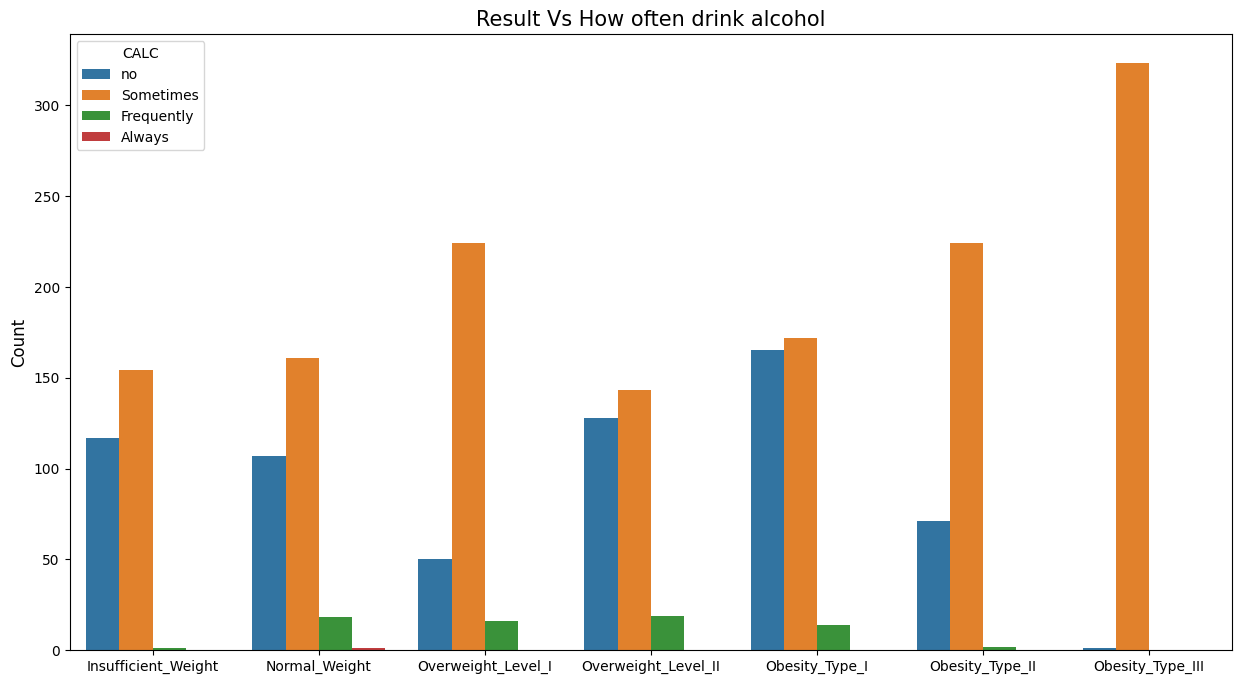

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='CALC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs How often drink alcohol',fontsize=15)
plt.show()

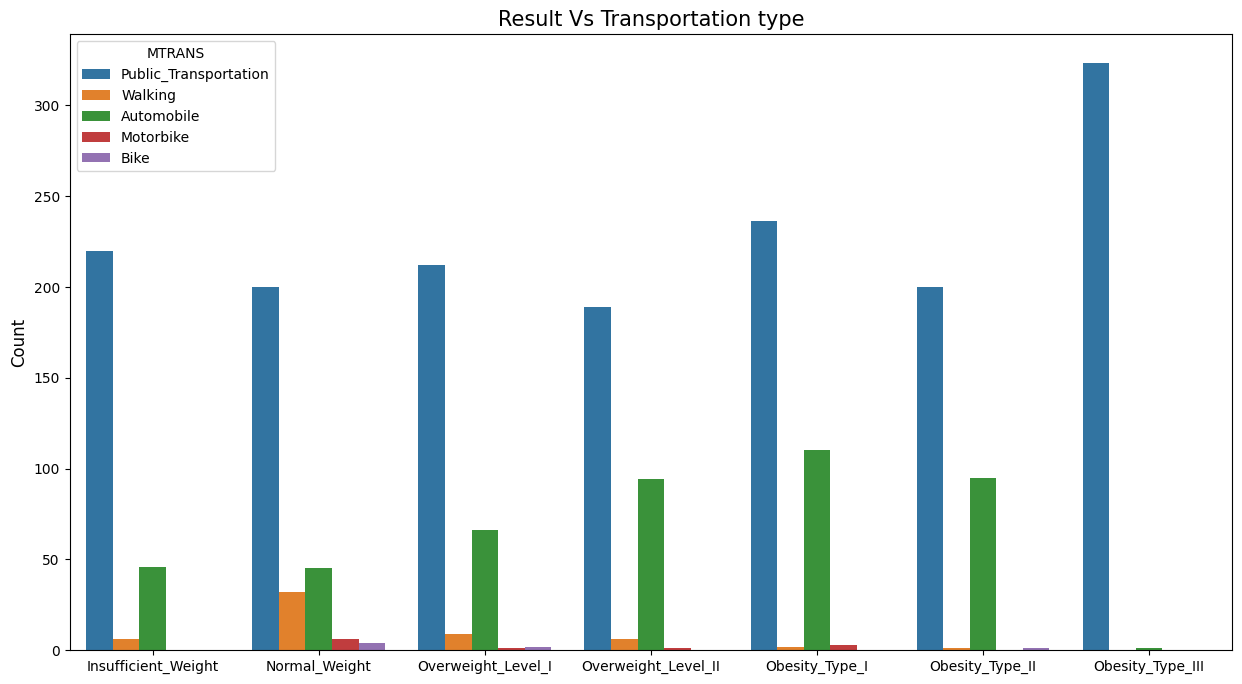

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='MTRANS',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Transportation type',fontsize=15)
plt.show()

In [37]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [38]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  \
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight   
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight   
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight   
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I   
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II   

   ln_weight  ln_height  
0   4.158883   0.482426  
1   4.025352   0.418710  
2   4.343805   0.587787  
3   4.465908   0.587787  
4   4.497585   0.576613

In [39]:
df["Gender"].value_counts()

1    1068
0    1043
Name: Gender, dtype: int64

In [40]:
df["CALC"].value_counts()

2    1401
3     639
1      70
0       1
Name: CALC, dtype: int64

## Splitting

In [41]:
# Split dataset
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2)

We split the datatset to have : a sample to train our models and another one to test it.

# Logistic Regression

In [42]:
# Logistic regression
reg = LogisticRegression()
reg.fit(X_train,y_train)
reg_pred = reg.predict(X_holdout)

In [43]:
# Confusion Matrix
confusion_matrix_reg = confusion_matrix(y_holdout, reg_pred)
accuracy_reg = accuracy_score(y_holdout, reg_pred)
precision_reg = precision_score(y_holdout, reg_pred, average='macro')
recall_reg = recall_score(y_holdout, reg_pred, average='macro')
f1_reg = f1_score(y_holdout, reg_pred, average='macro')
balanced_accuracy_reg = balanced_accuracy_score(y_holdout, reg_pred)

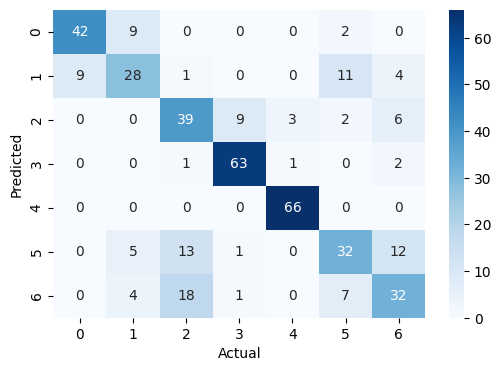

In [44]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_reg, annot=True, cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [45]:
print(classification_report(y_holdout,reg_pred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_holdout,reg_pred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.79      0.81        53
      Normal_Weight       0.61      0.53      0.57        53
     Obesity_Type_I       0.54      0.66      0.60        59
    Obesity_Type_II       0.85      0.94      0.89        67
   Obesity_Type_III       0.94      1.00      0.97        66
 Overweight_Level_I       0.59      0.51      0.55        63
Overweight_Level_II       0.57      0.52      0.54        62

           accuracy                           0.71       423
          macro avg       0.70      0.71      0.70       423
       weighted avg       0.71      0.71      0.71       423

Accuracy of Logistic Regression is :  71.39479905437352


# Multinomial Regression

In [46]:
# 1. Multinomial Regression
logreg_model = LogisticRegression(multi_class="multinomial", max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_holdout)

# Confusion Matrix
confusion_matrix_logreg = confusion_matrix(y_holdout, logreg_pred)
accuracy_logreg = accuracy_score(y_holdout, logreg_pred)
precision_logreg = precision_score(y_holdout, logreg_pred, average='macro')
recall_logreg = recall_score(y_holdout, logreg_pred, average='macro')
f1_logreg = f1_score(y_holdout, logreg_pred, average='macro')
balanced_accuracy_logreg = balanced_accuracy_score(y_holdout, logreg_pred)

In [47]:
print(classification_report(y_holdout,logreg_pred))
print("Accuracy of Multinomial Regression is : ",accuracy_score(y_holdout,logreg_pred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.83      0.83        53
      Normal_Weight       0.73      0.66      0.69        53
     Obesity_Type_I       0.75      0.83      0.79        59
    Obesity_Type_II       0.92      0.99      0.95        67
   Obesity_Type_III       0.99      1.00      0.99        66
 Overweight_Level_I       0.80      0.75      0.77        63
Overweight_Level_II       0.75      0.71      0.73        62

           accuracy                           0.83       423
          macro avg       0.82      0.82      0.82       423
       weighted avg       0.83      0.83      0.83       423

Accuracy of Multinomial Regression is :  82.97872340425532


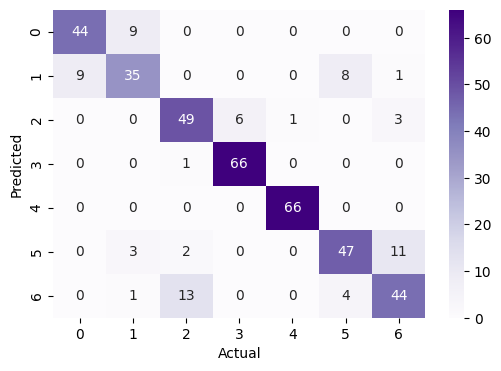

In [48]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_logreg, annot=True, cmap="Purples")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# KNN

In [49]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_holdout)

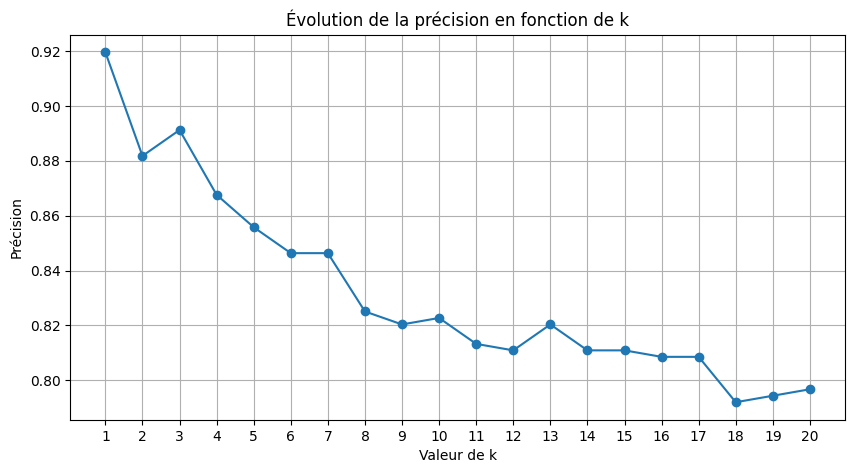

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà défini X_train_scaled, y_train, X_holdout_scaled, y_holdout

# Définir une liste de valeurs de k à tester
k_values = list(range(1, 21))

# Initialiser une liste pour stocker les précisions pour chaque valeur de k
accuracies = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    # Créer et former le modèle KNeighborsClassifier pour la valeur de k actuelle
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Faire des prédictions sur les données de validation
    knn_pred = knn_model.predict(X_holdout)
    
    # Calculer la précision et l'ajouter à la liste des précisions
    accuracy = accuracy_score(y_holdout, knn_pred)
    accuracies.append(accuracy)

# Tracer le graphique
plt.plot(k_values, accuracies, marker='o')
plt.title('Évolution de la précision en fonction de k')
plt.xlabel('Valeur de k')
plt.ylabel('Précision')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [51]:
print(classification_report(y_holdout,knn_pred))
print("Accuracy of KNN is : ",accuracy_score(y_holdout,knn_pred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.94      0.86        53
      Normal_Weight       0.72      0.55      0.62        53
     Obesity_Type_I       0.68      0.76      0.72        59
    Obesity_Type_II       0.89      0.96      0.92        67
   Obesity_Type_III       0.93      0.98      0.96        66
 Overweight_Level_I       0.78      0.71      0.74        63
Overweight_Level_II       0.72      0.63      0.67        62

           accuracy                           0.80       423
          macro avg       0.79      0.79      0.79       423
       weighted avg       0.79      0.80      0.79       423

Accuracy of KNN is :  79.66903073286052


In [52]:
# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_holdout, knn_pred)
accuracy_knn = accuracy_score(y_holdout, knn_pred)
precision_knn = precision_score(y_holdout, knn_pred, average='macro')
recall_knn = recall_score(y_holdout, knn_pred, average='macro')
f1_knn = f1_score(y_holdout, knn_pred, average='macro')
balanced_accuracy_knn = balanced_accuracy_score(y_holdout, knn_pred)

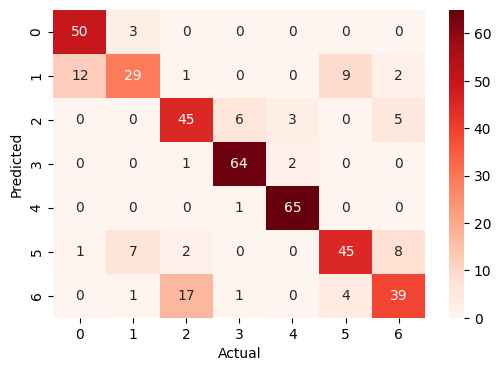

In [53]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_knn, annot=True, cmap="Reds")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Random Forest

In [54]:
# 4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_holdout)

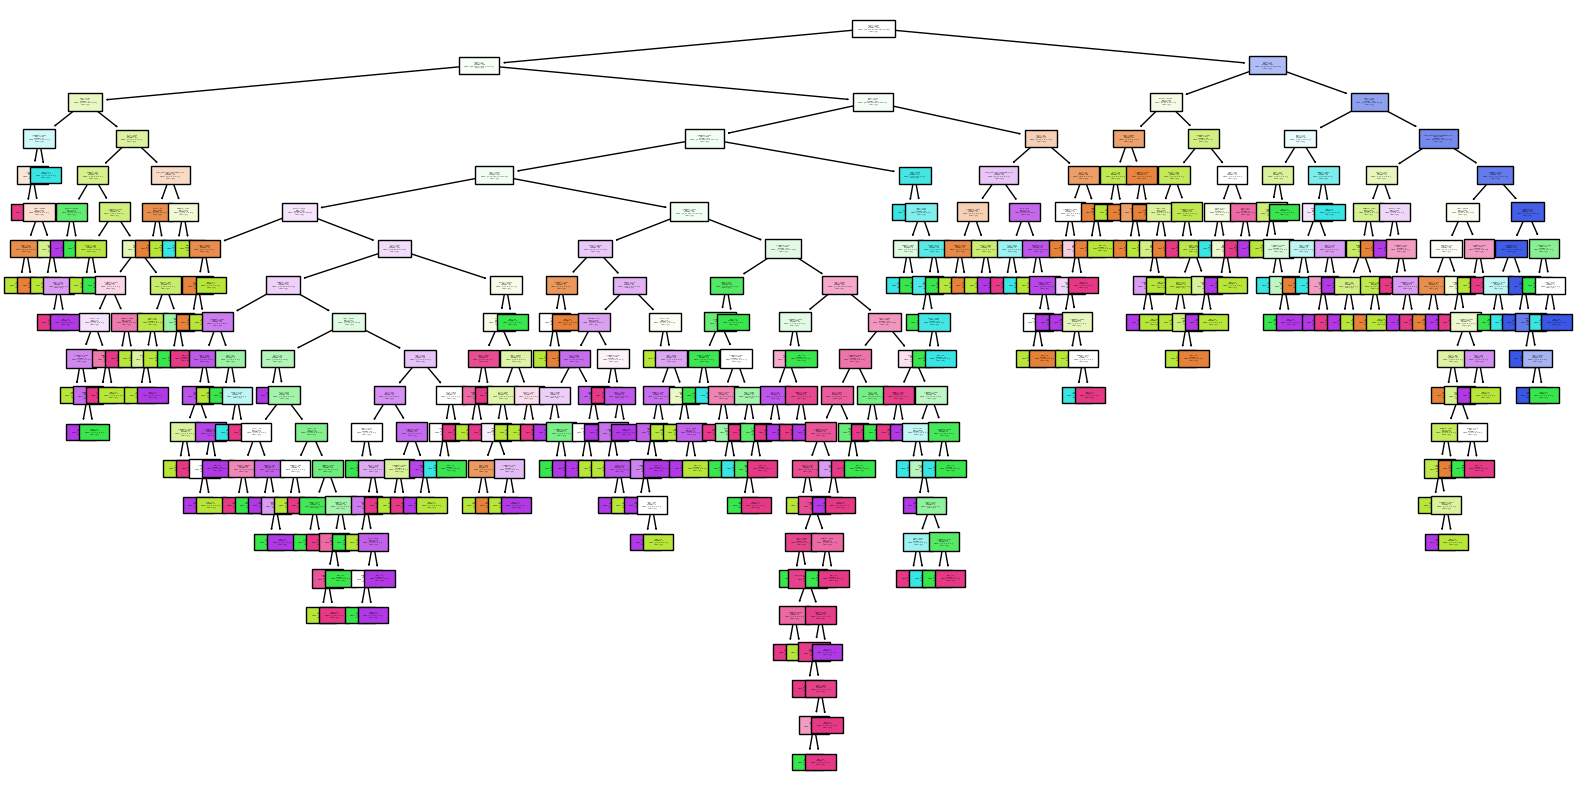

In [55]:
# Créer et entraîner le modèle de forêt aléatoire
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Extraire un arbre individuel de la forêt
tree_from_forest = rf_model.estimators_[0]

# Afficher le graphique de l'arbre de décision de la forêt aléatoire
plt.figure(figsize=(20,10))
tree.plot_tree(tree_from_forest, filled=True, feature_names=X_train.columns, class_names=True, fontsize=1)
plt.show()


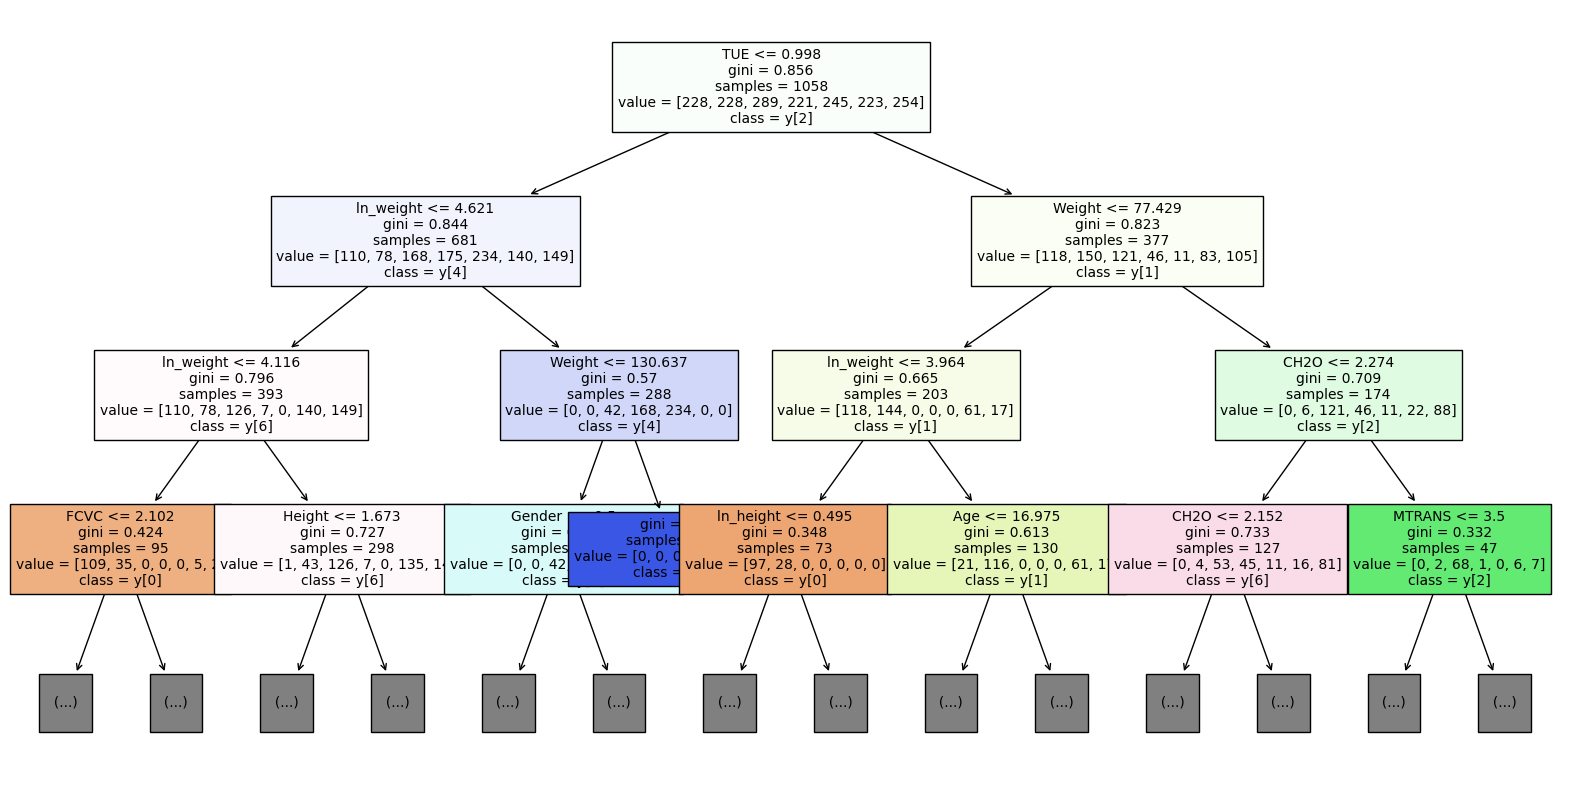

In [56]:
# Créer et entraîner le modèle de forêt aléatoire avec une profondeur maximale de 5
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Extraire un arbre individuel de la forêt
tree_from_forest = rf_model.estimators_[0]

# Afficher le graphique de l'arbre de décision de la forêt aléatoire avec une profondeur maximale de 5
plt.figure(figsize=(20,10))
tree.plot_tree(tree_from_forest, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10, max_depth=3)
plt.show()

In [57]:
# Confusion Matrix
confusion_matrix_rf = confusion_matrix(y_holdout, rf_pred)
accuracy_rf = accuracy_score(y_holdout, rf_pred)
precision_rf = precision_score(y_holdout, rf_pred, average='macro')
recall_rf = recall_score(y_holdout, rf_pred, average='macro')
f1_rf = f1_score(y_holdout, rf_pred, average='macro')
balanced_accuracy_rf = balanced_accuracy_score(y_holdout, rf_pred)

In [58]:
print(classification_report(y_holdout,rf_pred))
print("Accuracy of Random Forest is : ",accuracy_score(y_holdout,rf_pred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        53
      Normal_Weight       0.93      0.96      0.94        53
     Obesity_Type_I       1.00      1.00      1.00        59
    Obesity_Type_II       1.00      1.00      1.00        67
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.95      0.94      0.94        63
Overweight_Level_II       0.98      0.98      0.98        62

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

Accuracy of Random Forest is :  98.10874704491725


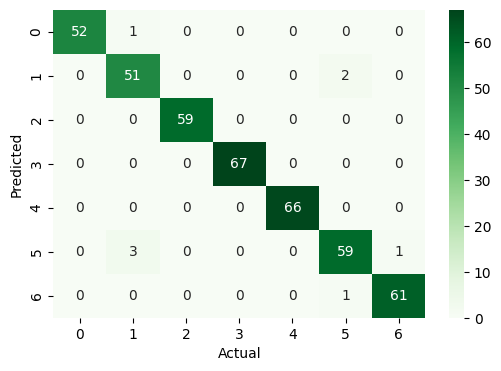

In [59]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Decision Tree

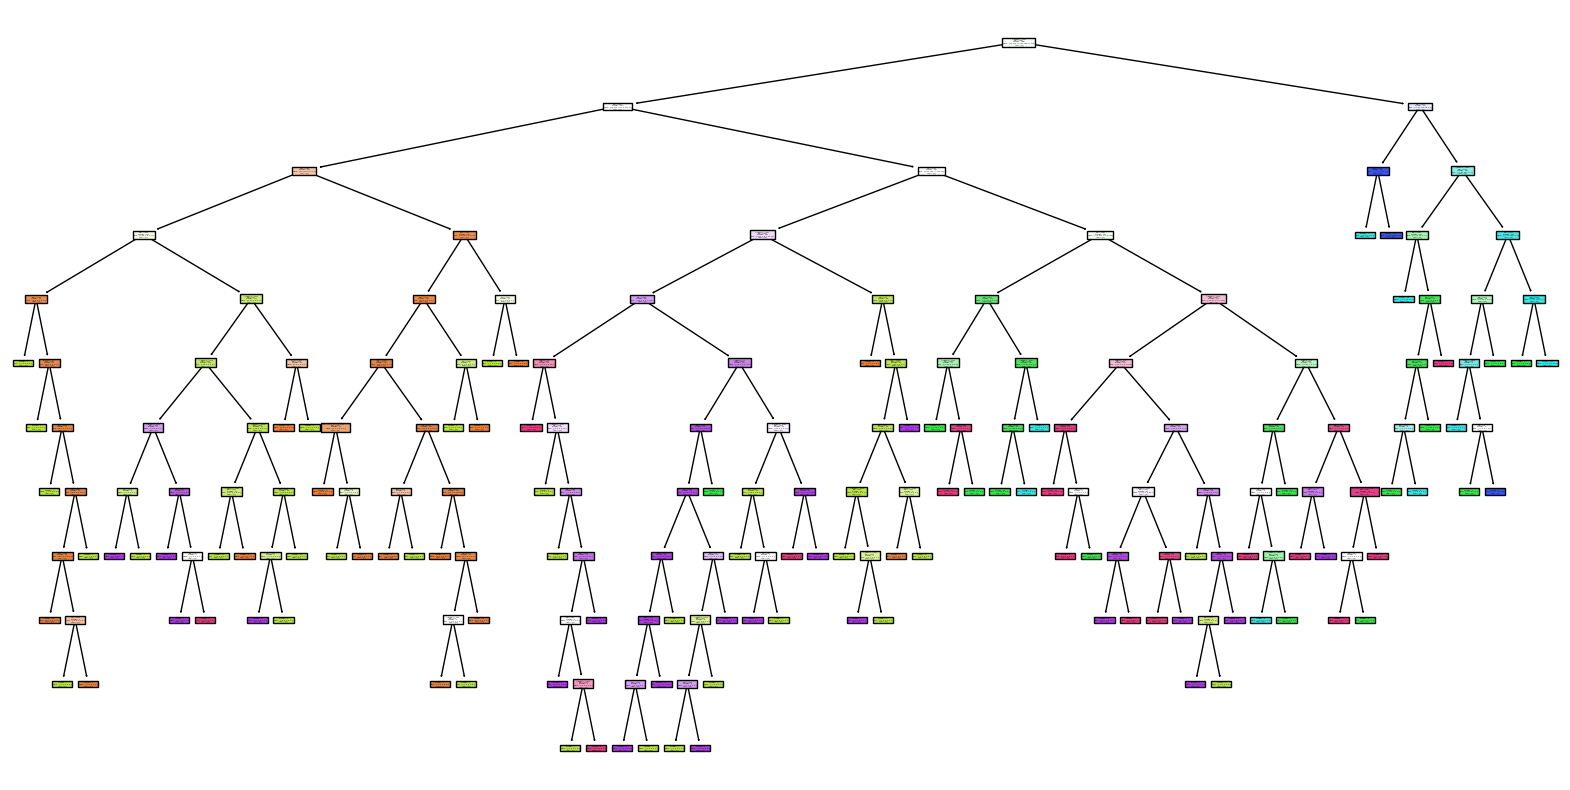

In [60]:
# Créer et entraîner l'arbre de décision
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Prédire avec l'ensemble de validation
dtreepred = dtree.predict(X_holdout)

# Calculer les différentes métriques
confusion_matrix_dt = confusion_matrix(y_holdout, dtreepred)
accuracy_dt = accuracy_score(y_holdout, dtreepred)
precision_dt = precision_score(y_holdout, dtreepred, average='macro')
recall_dt = recall_score(y_holdout, dtreepred, average='macro')
f1_dt = f1_score(y_holdout, dtreepred, average='macro')
balanced_accuracy_dt = balanced_accuracy_score(y_holdout, dtreepred)

# Afficher le graphique de l'arbre de décision
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


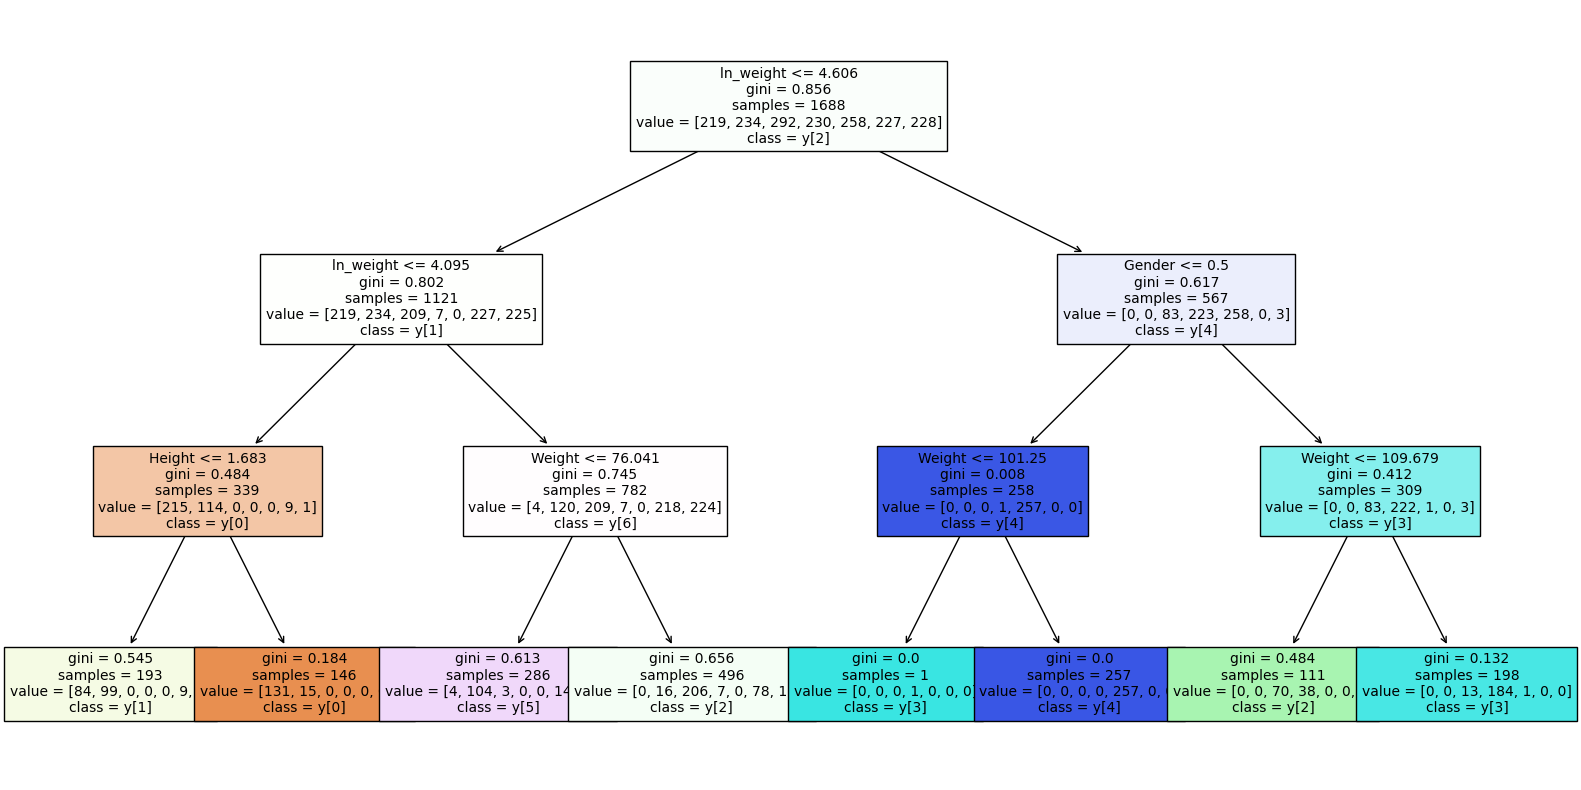

In [61]:
# Créer et entraîner l'arbre de décision avec une profondeur maximale de 5
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

# Afficher le graphique de l'arbre de décision avec des étiquettes plus grandes
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.show()


In [62]:
print(classification_report(y_holdout,dtreepred))
print("Accuracy of Decision tree is : ",accuracy_score(y_holdout,dtreepred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.92      0.94        53
      Normal_Weight       0.84      0.91      0.87        53
     Obesity_Type_I       0.94      0.98      0.96        59
    Obesity_Type_II       0.98      0.97      0.98        67
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.93      0.87      0.90        63
Overweight_Level_II       0.95      0.95      0.95        62

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423

Accuracy of Decision tree is :  94.56264775413712


In [63]:
# Confusion matrix
confusion_matrix_dt = confusion_matrix(y_holdout, dtreepred)
accuracy_dt = accuracy_score(y_holdout, dtreepred)
precision_dt = precision_score(y_holdout, dtreepred, average='macro')
recall_dt = recall_score(y_holdout, dtreepred, average='macro')
f1_dt = f1_score(y_holdout, dtreepred, average='macro')
balanced_accuracy_dt = balanced_accuracy_score(y_holdout, dtreepred)

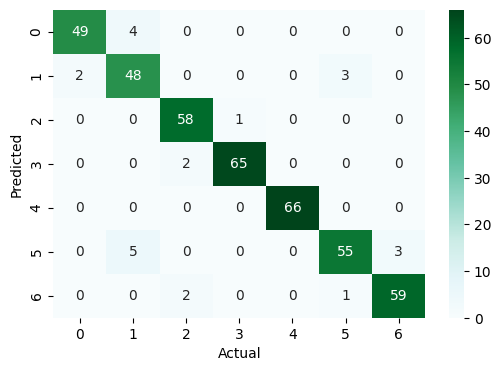

In [64]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_dt, annot=True, cmap="BuGn")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Boosted Tree

In [65]:
 #5. Boosted Tree
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_holdout)

# Confusion Matrix
confusion_matrix_gb = confusion_matrix(y_holdout, gb_pred)
accuracy_gb = accuracy_score(y_holdout, gb_pred)
precision_gb = precision_score(y_holdout, gb_pred, average='macro')
recall_gb = recall_score(y_holdout, gb_pred, average='macro')
f1_gb = f1_score(y_holdout, gb_pred, average='macro')
balanced_accuracy_gb = balanced_accuracy_score(y_holdout, gb_pred)

print(classification_report(y_holdout,gb_pred))
print("Accuracy of Boosted Tree is : ",accuracy_score(y_holdout,gb_pred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.96      0.96      0.96        53
     Obesity_Type_I       0.97      1.00      0.98        59
    Obesity_Type_II       1.00      1.00      1.00        67
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.97      0.90      0.93        63
Overweight_Level_II       0.94      0.97      0.95        62

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

Accuracy of Boosted Tree is :  97.63593380614657


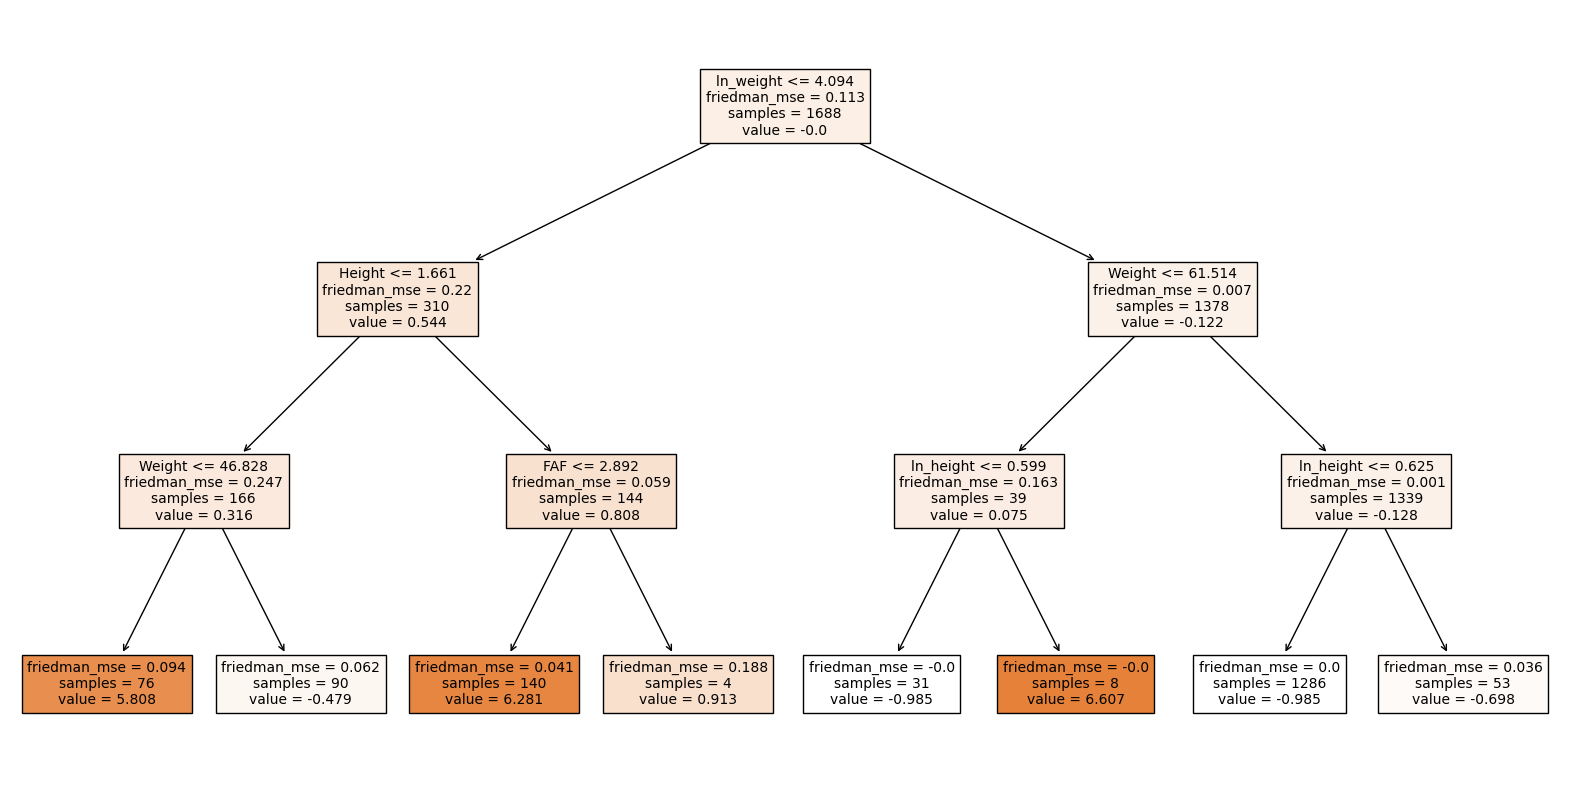

In [66]:
# Créer et entraîner le modèle de Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Afficher le graphique de l'arbre de décision issu du Gradient Boosting
plt.figure(figsize=(20,10))
plot_tree(gb_model.estimators_[0][0], filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.show()


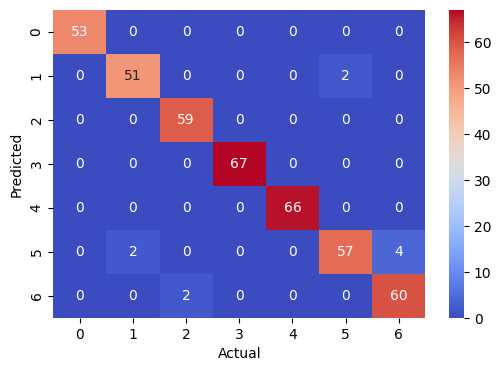

In [67]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_gb, annot=True, cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Model Comparison

In [68]:
models = ['KNN', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Boosted Tree', 'Multinomial Regression']
accuracies = [accuracy_knn, accuracy_rf, accuracy_dt, accuracy_reg, accuracy_gb, accuracy_logreg]
precisions = [precision_knn, precision_rf, precision_dt, precision_reg, precision_gb, precision_logreg]
recalls = [recall_knn, recall_rf, recall_dt, recall_reg, recall_gb, recall_logreg]
f1_scores = [f1_knn, f1_rf, f1_dt, f1_reg, f1_gb, f1_logreg]
balanced_accuracies = [balanced_accuracy_knn, balanced_accuracy_rf, balanced_accuracy_dt, balanced_accuracy_reg, balanced_accuracy_gb, balanced_accuracy_logreg]

In [69]:
model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions,
                                 'Recall': recalls, 'F1 Score': f1_scores,
                                 'Balanced Accuracy': balanced_accuracies})

In [70]:
# Convertir le dataframe en tableau
table = tabulate(model_comparison, headers='keys', tablefmt='fancy_grid', showindex=False)

# Afficher le tableau
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Model                  │   Accuracy │   Precision │   Recall │   F1 Score │   Balanced Accuracy │
╞════════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ KNN                    │   0.79669  │    0.788002 │ 0.790953 │   0.785527 │            0.790953 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Random Forest          │   0.981087 │    0.980394 │ 0.980539 │   0.980399 │            0.980539 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Decision Tree          │   0.945626 │    0.943863 │ 0.944003 │   0.943487 │            0.944003 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Logistic Regression    │   0.713948 │    0.704589 │ 0.706591 │   0.703194 │            0.706591 │


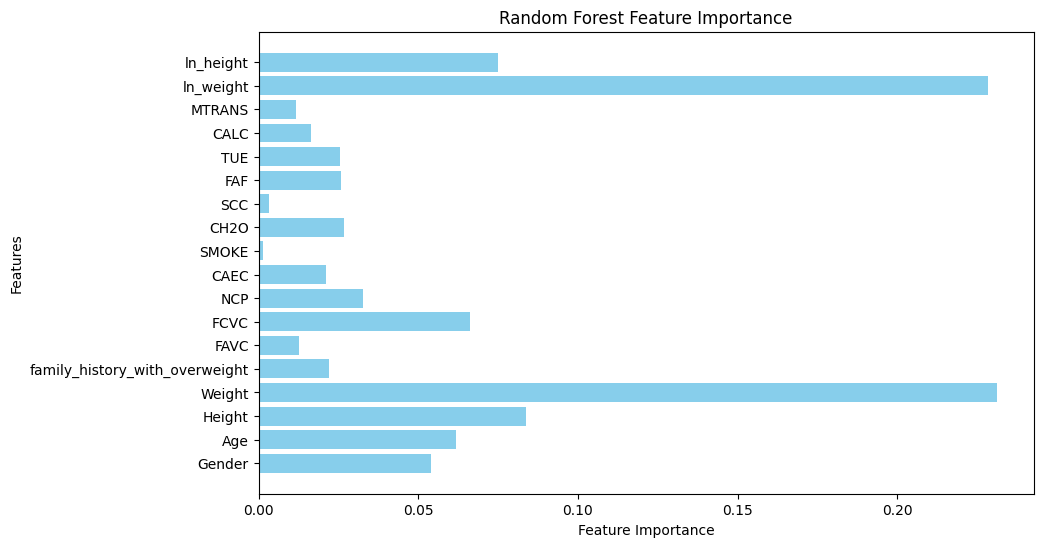

In [71]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, rf_model.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


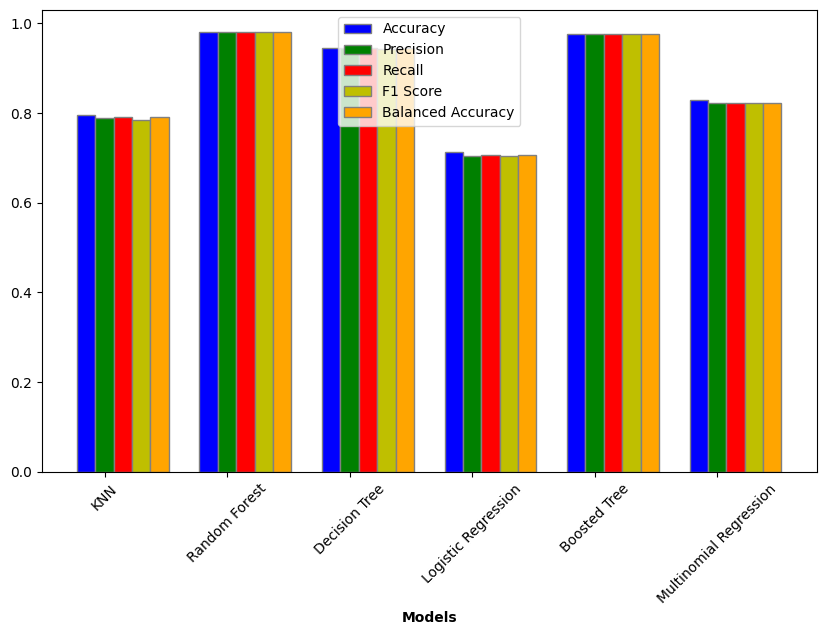

In [72]:
# Plotting
plt.figure(figsize=(10, 6))
barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, accuracies, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(r5, balanced_accuracies, color='orange', width=barWidth, edgecolor='grey', label='Balanced Accuracy')

z = range(1, len(uniq))
cmap = plt.get_cmap('hsv')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45)
plt.legend()
plt.show()